## Expected Threat - Challenge


1. Compute and plot the xT per zone/bin just for one team of the Premier league 17/18
2. StatsBomb has recently released a dataset with Indian Superleague 2021/22 games. Calculate xGchain values for these player. Note that the possesion chains are already isolated. Which player stood out the most?

In [1]:
import pandas as pd
import json
# plotting
import os
import pathlib
import warnings 
from joblib import load
from mplsoccer import Pitch
from itertools import combinations_with_replacement
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from scipy.stats import binned_statistic_2d
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

C:\Users\aleex\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout','chains', 'possession_chains_england.csv')
df = pd.read_csv(path,sep=';')
df.head()

,index,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,...,xG,shot_end,x,y,Cy,end_x,end_y,Cend_y,Cx,Cend_x
0,0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,...,0.0,0,51.45,34.68,0.68,32.55,14.96,19.04,53.55,72.45
1,1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,...,0.0,0,32.55,14.96,19.04,53.55,17.00,17.00,72.45,51.45
2,2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,...,0.0,0,53.55,17.00,17.00,36.75,19.72,14.28,51.45,68.25
3,3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,...,0.0,0,36.75,19.72,14.28,43.05,3.40,30.60,68.25,61.95
4,4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,...,0.0,0,43.05,3.40,30.60,75.60,8.16,25.84,61.95,29.40


In [3]:
var = ["x", "end_x", "Cy", "Cend_y"]

In [4]:
#combinations
inputs = []

inputs.extend(combinations_with_replacement(var, 1))
#one variable combinations
inputs.extend(combinations_with_replacement(var, 1))
#2 variable combinations
inputs.extend(combinations_with_replacement(var, 2))
#3 variable combinations
inputs.extend(combinations_with_replacement(var, 3))

In [5]:
for i in inputs:
    if len(i)>1:
        col= ''
        x=1
        
        for c in i:
            col+=c
            #print(col)
            
            x = x * df[c]
            
        df[col] = x
        var.append(col)
        
df.head()

,index,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,...,end_xend_xend_x,end_xend_xCy,end_xend_xCend_y,end_xCyCy,end_xCyCend_y,end_xCend_yCend_y,CyCyCy,CyCyCend_y,CyCend_yCend_y,Cend_yCend_yCend_y
0,0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,...,34486.806375,720.4617,20172.9276,15.05112,421.43136,11800.07808,0.314432,8.804096,246.514688,6902.411264
1,1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,...,153560.113875,54599.1516,48749.2425,19413.03168,17333.06400,15475.95000,6902.411264,6162.867200,5502.560000,4913.000000
2,2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,...,49633.171875,22959.5625,19286.0325,10620.75000,8921.43000,7494.00120,4913.000000,4126.920000,3466.612800,2911.954752
3,3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,...,79784.672625,26465.1597,56711.0565,8778.68712,18811.47240,40310.29800,2911.954752,6239.903040,13371.220800,28652.616000
4,4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,...,432081.216000,174890.0160,147684.9024,70788.81600,59777.22240,50478.54336,28652.616000,24195.542400,20431.791360,17253.512704


In [6]:
path_model = os.path.join(str(pathlib.Path().resolve()),'model','model_xT.json')
model = xgb.XGBClassifier()
model.load_model(path_model)

In [7]:
passes = df.loc[df["eventName"].isin(["Pass"])]
X = passes[var].values
y = passes["shot_end"].values

In [8]:
y_pred_proba = model.predict_proba(X)[::,1]
y_pred_proba

array([0.02430228, 0.05129451, 0.04117332, ..., 0.0587691 , 0.03088383,
       0.03974094], dtype=float32)

In [9]:
passes['shot_prob'] = y_pred_proba
shot_ended = passes[passes["shot_end"] == 1]
X2 = shot_ended[var].values
y2 = shot_ended["xG"].values

lr = LinearRegression()
lr.fit(X2,y2)

y_pred = lr.predict(X)
passes["xG_pred"] = y_pred

passes['xT'] = passes["xG_pred"] * passes['shot_prob']
passes.xT.isna().any()

False

In [10]:
shots = df[df['eventName']=='Shot']
plays = pd.concat([passes,shots])
plays['xT'] = np.where(plays.eventName=='Shot',plays.xG,plays.xT)
plays= plays.sort_values(['possesion_chain','possesion_chain_moment'])
plays[plays['possesion_chain']==4]

,index,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,...,end_xCyCy,end_xCyCend_y,end_xCend_yCend_y,CyCyCy,CyCyCend_y,CyCend_yCend_y,Cend_yCend_yCend_y,shot_prob,xG_pred,xT
25,37,8,Simple pass,[{'id': 1801}],49876,"[{'y': 31, 'x': 65}, {'y': 13, 'x': 90}]",2499719,Pass,1609,1H,...,15774.54480,30718.85040,59820.91920,2156.689088,4199.868224,8178.690752,15926.924096,0.160820,0.118235,0.019015
28,42,8,Simple pass,[{'id': 1801}],7868,"[{'y': 3, 'x': 90}, {'y': 13, 'x': 72}]",2499719,Pass,1609,1H,...,77220.98496,60790.98816,47856.73536,32645.273536,25699.470656,20231.498176,15926.924096,0.152956,0.088877,0.013594
29,43,8,High pass,[{'id': 1801}],49876,"[{'y': 13, 'x': 72}, {'y': 86, 'x': 86}]",2499719,Pass,1609,1H,...,57162.21168,55617.28704,54114.11712,15926.924096,15496.466688,15077.643264,14670.139392,0.113017,0.107229,0.012119
30,44,8,Simple pass,[{'id': 1801}],167145,"[{'y': 86, 'x': 86}, {'y': 71, 'x': 73}]",2499719,Pass,1609,1H,...,45934.07616,26794.87776,15630.34536,14670.139392,8557.581312,4991.922432,2911.954752,0.268544,0.068351,0.018355
31,45,8,Cross,"[{'id': 301}, {'id': 402}, {'id': 801}, {'id':...",120339,"[{'y': 71, 'x': 73}, {'y': 41, 'x': 88}]",2499719,Pass,1609,1H,...,18842.06016,8075.16864,3460.78656,2911.954752,1247.980608,534.848832,229.220928,0.303995,0.145869,0.044344
32,46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,...,3932.71200,0.00000,0.00000,229.220928,0.000000,0.000000,0.000000,NaN,NaN,0.137573


In [11]:
b = (16,12)

In [12]:
plays["start_sector"] = plays.apply(lambda row: tuple([i[0] for i in binned_statistic_2d(np.ravel(row.x), np.ravel(row.y),
                                                               values = "None", statistic="count",
                                                               bins=b, range=[[0, 105], [0, 68]],
                                                               expand_binnumbers=True)[3]]), axis = 1)
plays["end_sector"] = plays.apply(lambda row: tuple([i[0] for i in binned_statistic_2d(np.ravel(row.end_x), np.ravel(row.end_y),
                                                               values = "None", statistic="count",
                                                               bins=b, range=[[0, 105], [0, 68]],
                                                               expand_binnumbers=True)[3]]), axis = 1)

In [13]:
grouped_passes = plays[plays.eventName=="Pass"].groupby('start_sector')['xT'].sum().reset_index()
list_tuples= []
for i in range(1,b[0]+1):
    for j in reversed(range(1,b[1]+1)):
        list_tuples.append((i,j))
index_base = pd.DataFrame(np.array(list_tuples),columns=['x','y'])
index_base['index'] = list(zip(index_base.x, index_base.y))
index_base.drop(['x','y'],inplace=True,axis=1)

In [14]:
grouped = pd.merge(index_base,grouped_passes,how='left',left_on='index',right_on='start_sector')
grouped = grouped.fillna(0)
pitch = Pitch(line_color='black',pitch_type='uefa', line_zorder = 2)
stat = pitch.bin_statistic(plays.x, plays.y, statistic='count', bins=b, normalize=False)
grouped_passes_array = np.array(grouped['xT'].values).reshape(b[0],b[1]).T
stat['statistic'] = grouped_passes_array

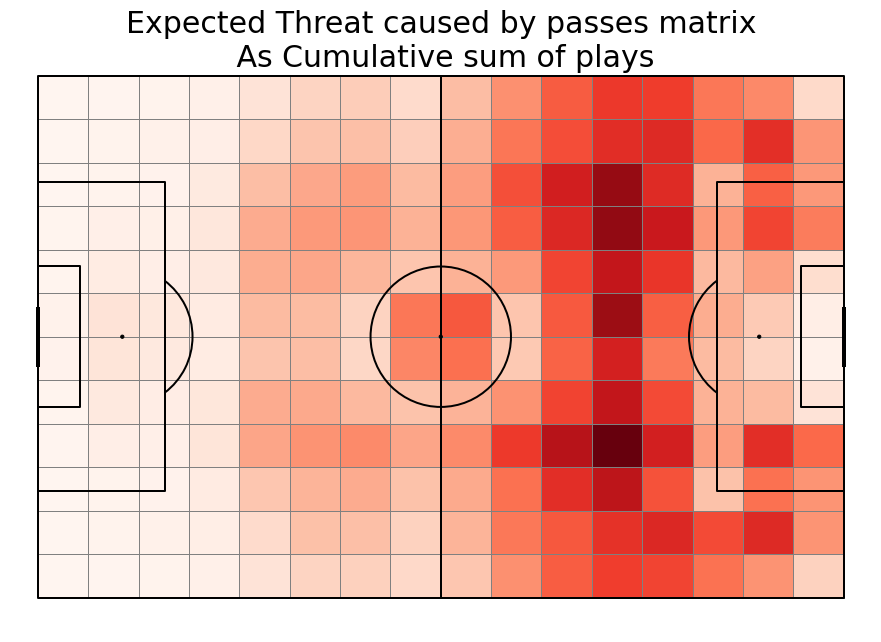

In [15]:
pitch = Pitch(line_color='black',pitch_type='uefa', line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.01, title_space=0, endnote_space=0)


pcm  = pitch.heatmap(stat, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#labels = pitch.label_heatmap(stat, color='blue', fontsize=9,
#                           ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
#ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
#cbar = plt.colorbar(pcm, cax=ax_cbar)
txt = 'Expected Threat caused by passes matrix\n As Cumulative sum of plays'
fig.suptitle(txt, fontsize = 30)
plt.show()

In [16]:
passes.teamId.unique()

array([ 1609,  1631,  1625,  1651,  1646,  1610,  1628,  1673,  1639,
        1623,  1611,  1633,  1613,  1624, 10531,  1619,  1644,  1612,
        1627,  1659], dtype=int64)

### Importemos los datos de equipo y de partido

In [17]:
path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', 'teams.json')
teams = pd.read_json(path)

path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', 'matches','matches_england.json')
matches = pd.read_json(path)

path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', 'players.json')
players = pd.read_json(path, encoding='unicode-escape')

In [18]:
plays = pd.merge(plays,teams[['wyId','officialName']],how='left',left_on='teamId',right_on = 'wyId')
plays = pd.merge(plays,matches[['wyId','label']],how='left',left_on='matchId',right_on = 'wyId')
plays = pd.merge(plays,players[['wyId','shortName']],how='left',left_on='playerId',right_on = 'wyId')

In [19]:
team_passes = plays[plays.teamId==1625]
team_passes.officialName.values[0]
agg_passes = team_passes[team_passes.eventName=='Pass'].groupby('start_sector')['xT'].sum().reset_index()
agg_passes_gr = pd.merge(index_base,agg_passes,how='outer',left_on='index',right_on='start_sector')
agg_passes_gr = agg_passes_gr.fillna(0)
agg_passes_gr_array = np.array(agg_passes_gr['xT'].values).reshape(b[0],b[1]).T
stat['statistic'] =(agg_passes_gr_array - (grouped_passes_array/20)) / (grouped_passes_array/20)

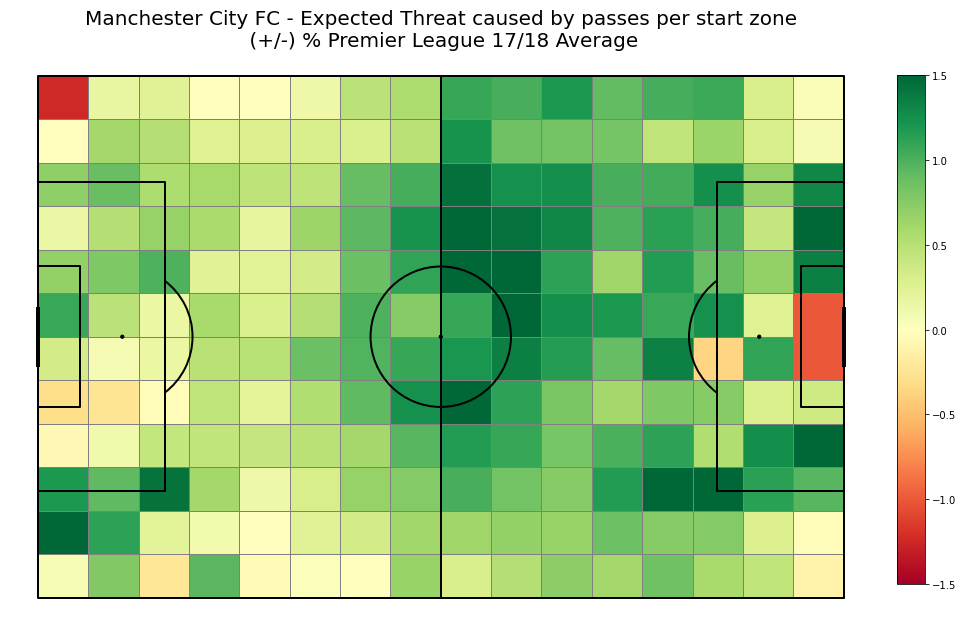

In [20]:
pitch = Pitch(line_color='black',pitch_type='uefa', line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.01, title_space=0, endnote_space=0)


pcm  = pitch.heatmap(stat, cmap='RdYlGn', edgecolor='grey', ax=ax['pitch'],vmin=-1.5,vmax = 1.5)
#labels = pitch.label_heatmap(stat, color='blue', fontsize=9,
#                           ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
txt = '{} - Expected Threat caused by passes per start zone\n (+/-) % Premier League 17/18 Average'.format(team_passes.officialName.values[0])
fig.suptitle(txt, fontsize = 20)
plt.show()

In [21]:
plays_pl = plays.groupby(['shortName'],as_index=False)['xT'].sum()
plays_pl.sort_values(by='xT',ascending=False).head(10)

,shortName,xT
270,K. De Bruyne,33.915555
136,David Silva,32.208794
358,Mohamed Salah,31.864348
81,C. Eriksen,31.099369
36,A. Sánchez,30.951482
417,R. Sterling,30.917015
187,H. Kane,30.612926
146,E. Hazard,26.923546
181,G. Xhaka,26.452341
354,M. Özil,26.397218


In [22]:
area = (4,2)
team_passes_end = team_passes[team_passes.start_sector==area].groupby(['end_sector'],as_index=False)['xT'].sum()
team_passes_end = pd.merge(index_base,team_passes_end,how='outer',left_on='index',right_on='end_sector')
team_passes_end = team_passes_end.fillna(0)
team_passes_end_array = np.array(team_passes_end['xT'].values).reshape(b[0],b[1]).T

Zona: (4, 2)


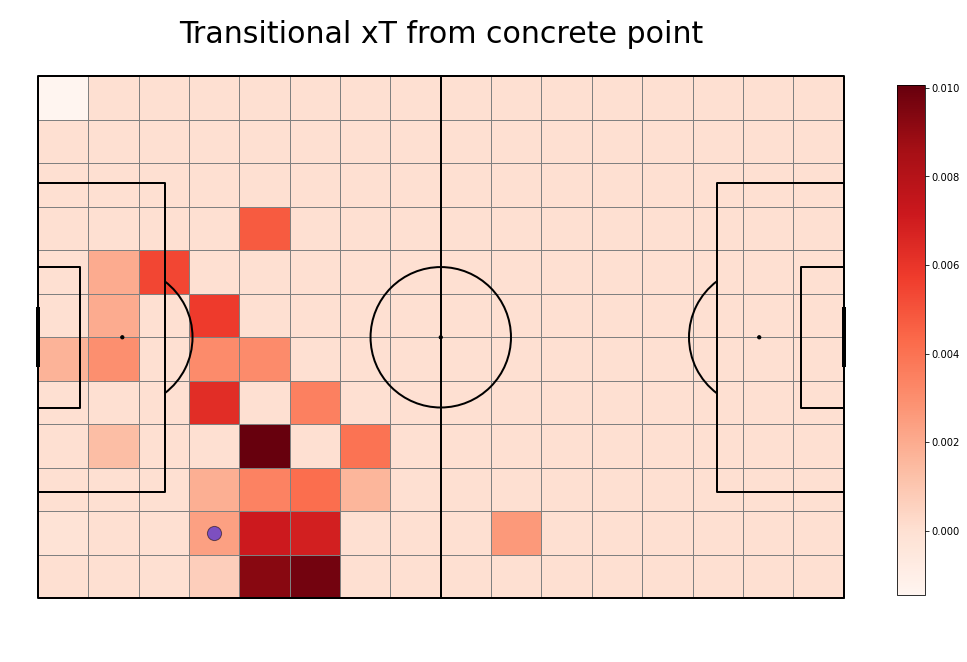

,shortName,xT
8,K. Walker,0.021963
9,N. Otamendi,0.020544
6,J. Stones,0.015452
11,V. Kompany,0.015132
5,Fernandinho,0.014914
1,Danilo,0.004797
4,Ederson,0.002583
10,R. Sterling,0.002391
7,K. De Bruyne,0.001933
12,İ. Gündoğan,0.001713


In [23]:
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#Change the index here to change the zone.
stat["statistic"] = team_passes_end_array
print('Zona: {}'.format((area[0],area[1])))
pcm  = pitch.heatmap(stat, cmap='Reds', edgecolor='grey', ax=ax['pitch'])

pitch.scatter(stat['cx'][area[1]-1][area[0]-1],
              stat['cy'][b[1] - area[1]][area[0]-1],
              alpha = 0.5, color = "blue", ax=ax['pitch'], edgecolors="black",s=200)
#pitch.scatter(team_passes[team_passes.start_sector==area].x.mean(),team_passes[team_passes.start_sector==area].y.mean(),
#              alpha = 0.5, color = "blue", ax=ax['pitch'], edgecolors="black",s=200)

#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Transitional xT from concrete point', fontsize = 30)
plt.show()
plays_pl = team_passes[team_passes.start_sector==area].groupby(['shortName'],as_index=False)['xT'].sum()
plays_pl.sort_values(by='xT',ascending=False).head(10)

In [24]:
team_passes = plays[plays.teamId==1612]
team_passes.officialName.values[0]
agg_passes = team_passes[team_passes.eventName=='Pass'].groupby('start_sector')['xT'].sum().reset_index()
agg_passes_gr = pd.merge(index_base,agg_passes,how='outer',left_on='index',right_on='start_sector')
agg_passes_gr = agg_passes_gr.fillna(0)
agg_passes_gr_array = np.array(agg_passes_gr['xT'].values).reshape(b[0],b[1]).T
stat['statistic'] =(agg_passes_gr_array - (grouped_passes_array/20)) / (grouped_passes_array/20)

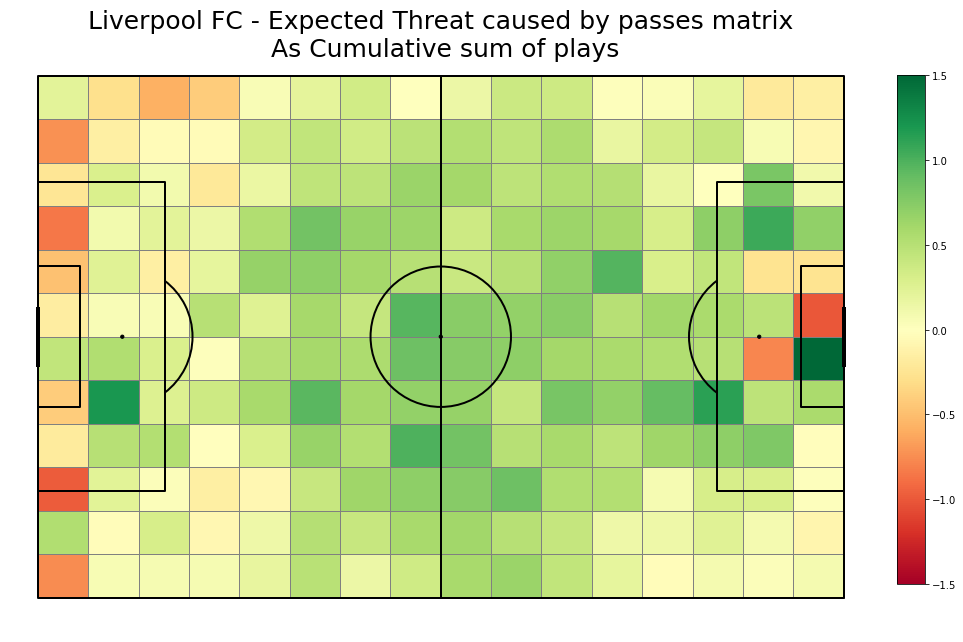

In [25]:
pitch = Pitch(line_color='black',pitch_type='uefa', line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.01, title_space=0, endnote_space=0)


pcm  = pitch.heatmap(stat, cmap='RdYlGn', edgecolor='grey', ax=ax['pitch'],vmin=-1.5,vmax = 1.5)
#labels = pitch.label_heatmap(stat, color='blue', fontsize=9,
#                           ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
txt = '{} - Expected Threat caused by passes matrix\n As Cumulative sum of plays'.format(team_passes.officialName.values[0])
fig.suptitle(txt, fontsize = 25)
plt.show()

In [26]:
team_passes_end = team_passes[team_passes.start_sector==area].groupby(['end_sector'],as_index=False)['xT'].sum()
team_passes_end = pd.merge(index_base,team_passes_end,how='outer',left_on='index',right_on='end_sector')
team_passes_end = team_passes_end.fillna(0)
team_passes_end_array = np.array(team_passes_end['xT'].values).reshape(b[0],b[1]).T

Zona: (4, 2)


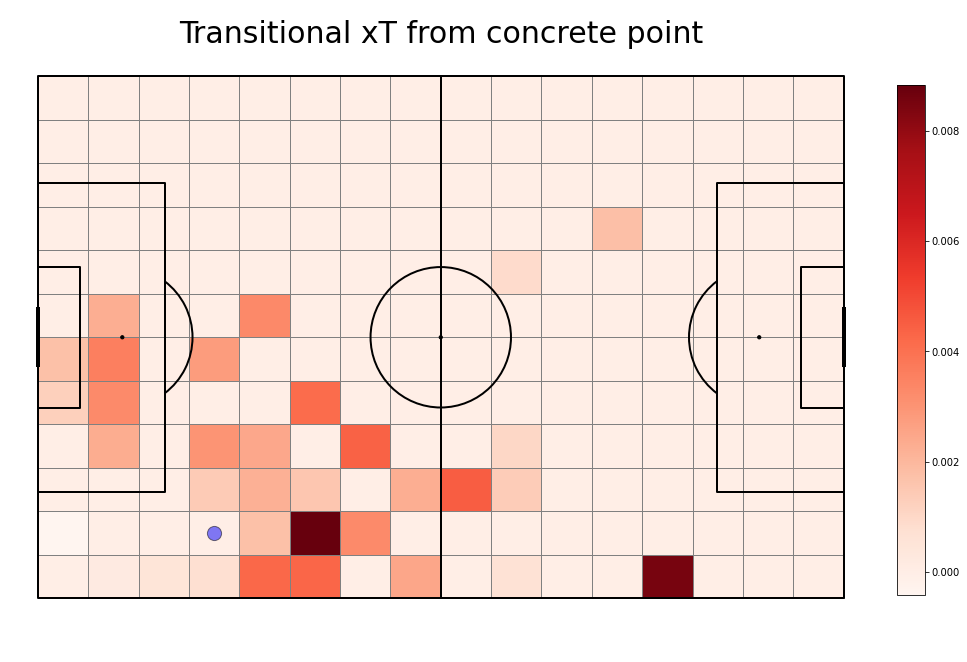

,shortName,xT
10,T. Alexander-Arnold,0.020794
6,J. Matip,0.014861
1,D. Lovren,0.014461
4,J. Gomez,0.013703
5,J. Henderson,0.006956
2,E. Can,0.005679
0,A. Oxlade-Chamberlain,0.004532
7,J. Milner,0.002860
3,G. Wijnaldum,0.001759
9,S. Mignolet,0.001058


In [27]:
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#Change the index here to change the zone.
stat["statistic"] = team_passes_end_array
print('Zona: {}'.format((area[0],area[1])))
pcm  = pitch.heatmap(stat, cmap='Reds', edgecolor='grey', ax=ax['pitch'])

pitch.scatter(stat['cx'][area[1]-1][area[0]-1],
              stat['cy'][b[1] - area[1]][area[0]-1],
              alpha = 0.5, color = "blue", ax=ax['pitch'], edgecolors="black",s=200)
#pitch.scatter(team_passes[team_passes.start_sector==area].x.mean(),team_passes[team_passes.start_sector==area].y.mean(),
#              alpha = 0.5, color = "blue", ax=ax['pitch'], edgecolors="black",s=200)

#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Transitional xT from concrete point', fontsize = 30)
plt.show()
plays_pl = team_passes[team_passes.start_sector==area].groupby(['shortName'],as_index=False)['xT'].sum()
plays_pl.sort_values(by='xT',ascending=False).head(10)